<a href="https://colab.research.google.com/github/ashikshafi08/Learning-Fastai/blob/main/Chapters%20Notebooks/Fastai_Refresher.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebooks will cover 4 chapters of the Fastai lectures. After 2 months of break and now I decided I have to go back and finish this book and take proper notes and use my skills in competition. 



In [1]:
# Installing fastai 
!pip install fastai --upgrade 

     |████████████████████████████████| 194kB 7.3MB/s 
     |████████████████████████████████| 61kB 7.1MB/s 
  Found existing installation: fastai 1.0.61
    Uninstalling fastai-1.0.61:
      Successfully uninstalled fastai-1.0.61


In [2]:
# Importing the needed libs 
from fastai import * 
from fastai.vision.all import *

# Under the hood: Training a Digit Training Classifier

In [3]:
# Reading the data
path = untar_data(URLs.MNIST_SAMPLE)
path.ls()

(#3) [Path('/root/.fastai/data/mnist_sample/labels.csv'),Path('/root/.fastai/data/mnist_sample/train'),Path('/root/.fastai/data/mnist_sample/valid')]

In [4]:
# Putting into sep variable of 3 and 7 
threes = (path / 'train' / '3').ls().sorted()
sevens = (path / 'train' / '7').ls().sorted()

threes[:5] , sevens[:5]

((#5) [Path('/root/.fastai/data/mnist_sample/train/3/10.png'),Path('/root/.fastai/data/mnist_sample/train/3/10000.png'),Path('/root/.fastai/data/mnist_sample/train/3/10011.png'),Path('/root/.fastai/data/mnist_sample/train/3/10031.png'),Path('/root/.fastai/data/mnist_sample/train/3/10034.png')],
 (#5) [Path('/root/.fastai/data/mnist_sample/train/7/10002.png'),Path('/root/.fastai/data/mnist_sample/train/7/1001.png'),Path('/root/.fastai/data/mnist_sample/train/7/10014.png'),Path('/root/.fastai/data/mnist_sample/train/7/10019.png'),Path('/root/.fastai/data/mnist_sample/train/7/10039.png')])

In [5]:
# Representing in a numpy array 
img_3 = threes[1]
im3 = Image.open(img_3)
im3.show()
np.array(im3)[4:10 , 4:10] # rows and columns 

array([[  0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,  29],
       [  0,   0,   0,  48, 166, 224],
       [  0,  93, 244, 249, 253, 187],
       [  0, 107, 253, 253, 230,  48],
       [  0,   3,  20,  20,  15,   0]], dtype=uint8)

In [6]:
# Stacking all the images in the directory, and converting into tensors

seven_tensor = [tensor(Image.open(o)) for o in sevens]
three_tensor = [tensor(Image.open(o)) for o in threes]

Calculate the average over all the images of the intensity of the pixel. 

Our tensors are in integers let's stack them and convert into float by dividing them by 255. 

In [7]:
stacked_sevens = torch.stack(seven_tensor).float() / 255
stacked_threes = torch.stack(three_tensor).float() / 255

stacked_sevens[:1]

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

In [8]:
# Checking the shape 
stacked_sevens.shape , stacked_threes.shape

(torch.Size([6265, 28, 28]), torch.Size([6131, 28, 28]))

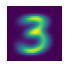

In [9]:
# Finding the ideal 3 by taking average along the 0th dimension
mean_3 = stacked_threes.mean(dim = 0)
mean_7 = stacked_sevens.mean(dim = 0)
show_image(mean_3)

Now we have two stuffs, one the ideal image and the actual image. We have to calculate the distance between them. 

- Mean absolute difference --> replaces negative with positive values
- Mean Squared Error --> makes everything positive. 

In [10]:
# Creating a vlid 3 and 7 tensors

valid_3_tens = torch.stack([tensor(Image.open(o)) for o in (path / 'valid' / '3').ls()])
valid_7_tens = torch.stack([tensor(Image.open(o)) for o in (path / 'valid' / '7').ls()])

# Converting them into 0 and 1 
valid_3_tens = valid_3_tens.float() / 255
valid_7_tens = valid_7_tens.float() / 255 

# Shape of the valid tensors 
valid_3_tens.shape , valid_7_tens.shape

(torch.Size([1010, 28, 28]), torch.Size([1028, 28, 28]))

In [11]:
# Writing the function which cal dist btw ideal and arbitrary value
# taking the mean ranging over the values indexed by the last two axes of the tensors
def mnist_distance(a , b):
  return (a - b).abs().mean((-1 , -2))

# Using the function 
valid_3_dist = mnist_distance(valid_3_tens , mean_3)
valid_3_dist.shape 


torch.Size([1010])

In [12]:
# The first 5 sample's distance 
valid_3_dist[:5]

tensor([0.1163, 0.1270, 0.1241, 0.1097, 0.1165])

In [13]:
# Taking one sample from 3 and 7 
a_3 = stacked_threes[5]
a_7 = stacked_sevens[6]

len(a_3) , len(a_7)

(28, 28)

In [14]:
# Calculating the distance between ideal and single image file 
mnist_distance(a_3 , mean_3) , mnist_distance(a_7 , mean_7)

(tensor(0.1700), tensor(0.1542))

In [15]:
# Function to check whether a tensor is 3 or not 
def is_3(x):
  '''
  the distance should between the tensor and the mean 3 should be less than the mean 7, we can call it as a 3
  '''
  return mnist_distance(x , mean_3) < mnist_distance(x , mean_7)

# Passing one tensor 
is_3(a_3) # this is 3 and should return 3 

tensor(True)

In [16]:
# Passing our whole valid 3 set and see how it goes 
is_3(valid_3_tens)

tensor([True, True, True,  ..., True, True, True])

In [17]:
# Alright now calculate the distance for 3 and 7 
accuracy_3s = is_3(valid_3_tens).float().mean()

# For 7 we will take the inverse of all the 7s (since we don't have is_7 function)
accuracy_7s = (1 - (is_3(valid_7_tens).float().mean()))

accuracy_3s , accuracy_7s

(tensor(0.9168), tensor(0.9854))

In [18]:
# It will perform worse since it's 7 
is_3(valid_7_tens).float().mean()

tensor(0.0146)

## SGD 

- This is something that will allow our model to get better and better which gives the **ability of learning to the model**.

**How do we make it work?**
- Assign a weight 
- Tweak the weight (parameters) and improve based on the weight assignment.

**What can we do to our pixel similarity in order to apply SGD (or a optimizer)?**
- Assign a weight for each pixel values.



In [19]:
# Probability of a number being 8
def pr_eight(x , w):
  '''
  w = weights for the pixels 
  x = input image 
  '''
  return (x*w).sum()

The above function will help us to update the weight `w` for every iteration and make our weight assignemnt better and better. 

> Converting the above function `pr_8` to a machine learning classifier: 
- Initialize the weights 
- For each image, use the weights that was initialized and predict whether it appears to be a 3 or a 7. (Step 2)
- Based on the predictions, **calculate how good the model is** (*Calculte loss*). 
- Tweak (step) the weights based on the above calculation. 
- Go back again to Step 2, where you use the weights and make predictions. 
- Iterate this process until we decide to stop the training. 

#### Guidelines

- **Initialize**

    We initialize the parameters (or) weights to random values at first. It's believed starting with random weights (or) values works perfectly well. 

- **Loss**

    A function will return a number that is small when the performance of the model is good. The standard approach is to treat a **small loss as a good and large loss as bad.** 

- **Step**

    A simple way to figure out whether a weight should be increased a bit or decreased, would be just try to increase the **weight** by a small amount and observe the loss goes up or down. We do this **increment and decrement until we find an amount that satisfy us**. 

    However, we use calculus to take care of this. Finding which direction and roughly how much, to change each weight without doing those adjustments above. 

    We do this by calculating ***gradients.*** This is just an **performance optimization.**

- **Stop**

    This is the phase where we choose the epochs to train the model for, we would keep training until the accuracy of the model started getting worse or ran out of time.




#### Calculating Gradients 

In here we will use calculus as a performance optimizartion. 

**But why ?**
- It will help us quickly to calculate whether our loss will go up and down as we are adjusting the parameters.

> Gradients will tell us how much we have to change each weight to make our model better

**What the hell is a derivative?**
- it calculates the change of a equation rather a value.
- For instance, the derivative of the quadratic function at the value 3 tells us how rapidly the function changes at the value 3. 

**Exact definition of a gradient**

*Gradient is defined as rise/run that is the change in the value of the function, divided by the change in the value of the parameter.*

The takeaway: 
- When we know how our function would change, then we know what we need to do in order to make it smaller (loss function). 
- The key is having a function and change the parameter of the function to make the loss smaller. 

#### Things to know

- The function will return not one but alot of weights, so when we calculate the derivative we will get alots of number, `i.e gradient for every weight`. 
- `requires_grad_()` special method tells pytorch we want to calculate gradients w.r.t to the variable at the value. For instance, in 3x (x). By doing this Pytorch, will keep track of all the computed gradients. 
- `backward` --> backpropagation, this is process of calculating the derivative (gradients) for each layer. 
- In `backward pass` we calculate the gradients of a neural network, and on `forward pass` we calculate the activations of a neural net.

> **Backpropagation** is a training algorithm consisting of 2 steps: 
1. Feed forward the values 
2. Calculate the error and propagate it back to the earlier layers. So to be precise, forward-propagation is part of the backpropagation algorithm but comes before back-propagating.


- https://datascience.stackexchange.com/questions/66416/forward-pass-vs-backward-pass-vs-backpropagation
- https://stackoverflow.com/questions/28403782/what-is-the-difference-between-back-propagation-and-feed-forward-neural-network


In [20]:
# Calculating Gradients with Pytorch

import torch 

# Creating a tensor (will keep track of the gradients of the value
xt = tensor(8.).requires_grad_()

# Sample function 
def f(x): return x**2

# Performing some computations with xt
yt = f(xt)
yt

tensor(64., grad_fn=<PowBackward0>)

In [21]:
# Telling pytoch to calculate the gradients by calling grad 
yt.backward() # always pass a function

In [22]:
# Now viewing the gradients calculated on our variable 
xt.grad # now get the gradient on a variable

tensor(16.)

The graidents will tell us only the slope of our function, they don't really say how far we should adjust the parameters. 

https://en.wikipedia.org/wiki/Slope#Calculus

- If slope is very large --> More adjustments to do 
- If slope is very small --> We are close to the optimal value. 

### Stepping (way to increase/decrease weight) with a Learning Rate 
- This is the idea of **multiplying the gradient by a small number** (that is the learning rate).
- We can adjust the learning rate by, `w- = w.grad * lr`. 

This means we get the gradients and multiply the gradients with a learning rate. 

- If the learning rate is too low, optimization will take a lot of time because steps towards the minimum of the loss function are tiny.
- If the learning rate is too high, it can result in getting the *loss* worse. Rather than diverging (or) converging it will bounce around. 
https://towardsdatascience.com/estimating-optimal-learning-rate-for-a-deep-neural-network-ce32f2556ce0

### An End-to-End SGD Example 



In [23]:
# Time 
time = torch.arange(0 , 20).float()
# Time in seconds 
time

tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
        14., 15., 16., 17., 18., 19.])

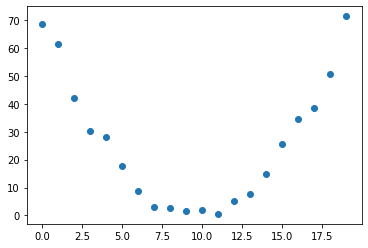

In [24]:
# Calculating the speed -> a*(t**2) + (b*t) + c
speed = torch.randn(20)*3 + 0.75*(time -9.5)**2 + 1

# Plotting the time and speed
plt.scatter(time , speed)

In [25]:
def f(t , params):
  a , b , c = params
  return a*(t**2) + (b*t) + c

Every quadratic function returns 3 values a, b and c. 

In [26]:
# Since we're on a continous data our loss function would be mse
def mse(preds , targs):
  return ((preds - targs)**2).mean()

In [27]:
# Firstly --> Initialize the parameters
params = torch.randn(3).requires_grad_()
params # a b c

tensor([-0.6014, -0.4658,  0.0860], requires_grad=True)

In [28]:
# Calculating the predictions 
preds = f(time , params)
preds

tensor([ 8.6020e-02, -9.8116e-01, -3.2511e+00, -6.7238e+00, -1.1399e+01,
        -1.7277e+01, -2.4358e+01, -3.2642e+01, -4.2129e+01, -5.2818e+01,
        -6.4710e+01, -7.7804e+01, -9.2102e+01, -1.0760e+02, -1.2431e+02,
        -1.4221e+02, -1.6132e+02, -1.8163e+02, -2.0314e+02, -2.2586e+02],
       grad_fn=<AddBackward0>)

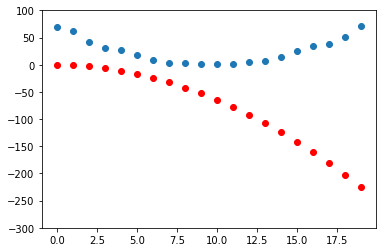

In [29]:
# A function to plot both targets and preds to see how close our predictins are

def show_preds(preds , ax=None):
  if ax is None: ax=plt.subplots()[1]
  ax.scatter(time , speed)
  ax.scatter(time , to_np(preds) , color='red')
  ax.set_ylim(-300 , 100)

show_preds(preds)

In [30]:
# Now the next step --> Calculate the loss
loss = mse(preds , speed)
loss

tensor(17125.1289, grad_fn=<MeanBackward0>)

In [31]:
# Calculating the gradients (from the loss function)
loss.backward()
params.grad # for a,b,c we get the gradients

tensor([-43020.1797,  -2764.1472,   -208.7129])

In [32]:
# Just multiplying lr with gradients 
params.grad * 1e-5

tensor([-0.4302, -0.0276, -0.0021])

In [33]:
# Stepping --> update the gradients with a learnin rate 
lr = 1e-5 # learning rate 

# Functionality that's help us in updating the learning rate 
params.data -= lr * params.grad.data
params.grad = None



In [34]:
# Putting everything into a function 
def apply_step(params , prn = True):
  # Getting the predictions 
  preds = f(time , params)
  # Calculate the loss 
  loss = mse(preds , speed)
  # Initiating back prop on loss function 
  loss.backward()
  # Stepping with a learning rate (multiplying the gradients with a lr)
  params.data -= lr * params.grad.data
  params.grad = None
  if prn:
    # Getting only the numbers (we don't want the tensors)
    print(loss.item())
  return preds


In [35]:
# Iterating 
for i in range(10):
  apply_step(params)

3790.90576171875
1267.6602783203125
790.181640625
699.8248291015625
682.7233276367188
679.4840087890625
678.8677978515625
678.7479248046875
678.7220458984375
678.7139892578125


#### Summarizing Gradient Descent

- At beginning, the weights of our model can be random (or) from pre-trained model.
- We compare the model with our targets and prediction using a **loss function,** which returns a number that we want to make as low as possible by **improving our weights.**
- To find how to change the **weights** to make the loss a bit better, we use calculus to **calculate the gradients.**
- Calculating gradients is similar finding a steepest downward slope, we use the **magnitude of the gradient** (steepness of a slope) to tell us how big a step to take.
- To decide on the step size, we multiply the gradient by a number we choose called the **learning rate.**
- We then iterate until we have reached the lower point, and then stop.

In [36]:
# Changing them from a list of matrices (rank 3) to a list of vectors (rank 2)

train_x = torch.cat([stacked_threes , stacked_sevens]).view(-1 , 28*28)
train_x.shape

torch.Size([12396, 784])

>`-1` —> denotes the row, since we don't know how many rows exactly in a dataset (or) this image, we use -1. Which says make this axis as big as necessary to fit all the data. Like we do in slicing!

In [37]:
# Constructing our labels (3s -> 1 & 7s -> 0s)

train_y = tensor([1] * len(threes) + [0] * len(sevens)).unsqueeze(1)
train_y.shape

torch.Size([12396, 1])

In [38]:
# Zipping x and y into a dataset 
dset = list(zip(train_x , train_y))
x , y = dset[0] # take one sample

# Checking the shape 
x.shape , y.shape

(torch.Size([784]), torch.Size([1]))

In [39]:
# x and y 

print(f'Images in Tensor (sliced) : {x[0 : 100]}')
print('----------------- ------------ --------- -------')
print(f'Labels: {y}')

Images in Tensor (sliced) : tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.])
----------------- ------------ --------- -------
Labels: tensor([1])


In [40]:
# Doing the exact thing for our validation set 

valid_x = torch.cat([valid_3_tens , valid_7_tens]).view(-1 , 28*28)
valid_y = tensor([1]*len(valid_3_tens) + [0]*len(valid_7_tens)).unsqueeze(1)

# Putting them into a dataset 
valid_dset = list(zip(valid_x , valid_y))

**Initialize the parameters with random numbers**

In [41]:
# Generate weight for every pixel 
def init_params(size , std = 1.0):
  return (torch.randn(size) * std).requires_grad_()



In [42]:
# Using the function and creating random weights 
weights = init_params(size = (28*28 , 1) , std=1.0)
weights.shape

torch.Size([784, 1])

In [43]:
# Initializing bias 

bias = init_params(1)

In [44]:
# Prediction on one image 
(train_x[0] * weights.T).sum() + bias


tensor([15.6965], grad_fn=<AddBackward0>)

Alright so far we have made a initializer function that gives us random weights, we got: 
- Function to calculate the predictions

In [45]:
# Constructing the matrix multiplication function (y = wx + b)

# As we can say our tiny model indeed 
def linear1(xb):
  '''
  xb --> Input training batch

  We return by multiplying the weights to our each input mini-batch
  '''
  return xb@weights + bias

# Getting the predictions for all images in the training set (x)
preds = linear1(train_x)
preds[:10]

tensor([[15.6965],
        [12.5594],
        [11.0378],
        [ 6.3067],
        [ 9.5201],
        [ 6.9801],
        [ 8.2247],
        [ 8.5636],
        [13.9851],
        [16.8662]], grad_fn=<SliceBackward>)

Looking back before jumping into calculus and other stuffs first we make a prediction on our input data, then observe how the model/function performs? Not well? 

Alright we will decide that by passing the preds and targs into a loss function. And we know our goal is to minimize the loss so now we we will get the help of calculus (gradients) that will help our loss function to find the minimum. 



In [46]:
# Calculating the accuracy
corrects = (preds > 0.0).float() == train_y

In [47]:
# Manually tweaking one value of the weight matrix 
with torch.no_grad():
  weights[0] *= 1.001


Making a change with just `weights[0] *=1.001` throws an error, this is because we are trying to access even the graidents and make a change in that. 

By using with `torch.no_grad()` we can turn of the gradients and make computations just on the value of the matrices. 

https://datascience.stackexchange.com/questions/32651/what-is-the-use-of-torch-no-grad-in-pytorch

Gradients tells the loss function how to make changes in order to tweak the weights. 



 

Reads: 
- https://discuss.pytorch.org/t/what-is-the-purpose-of-is-leaf/87000/5
- https://stackoverflow.com/questions/57188409/assigning-a-parameter-to-the-gpu-sets-is-leaf-as-false
- https://forums.fast.ai/t/weights-0-in-place-operations/89308



In [48]:
# Making the prediction after manually tweaking the value 
preds = linear1(train_x)

((preds > 0.0).float() == train_y).float().mean().item()

0.6129396557807922

If we are going to use accuracy as an performance metric the slight changes in the weight won't make a difference in the loss function. 

So we need a metrics where little changes on the weight matrice should make a impact on the loss function. 

> We need a loss function that when our weights result in slightly better predictions, gives us a slightly better loss.

The only thing our model will do is, given a number predicts it whether an 3 or not. if it's not 3 then it has to be 7. 




In [49]:
# Calculating the loss 
trgts = tensor([1 , 0 , 1])
prds = tensor([0.9 , 0.4 , 0.2])

# Creating our own loss function 
def mnist_loss(predictions , targets):
  return torch.where(targets == 1 , 1 - predictions , predictions).mean()

In [50]:
mnist_loss(prds , trgts)

tensor(0.4333)

In [53]:
# Importing utils from the fastbook 

#!pip install -q fastbook 
#from fastbook import *

     |████████████████████████████████| 727kB 8.7MB/s 
     |████████████████████████████████| 51kB 7.0MB/s 
     |████████████████████████████████| 1.2MB 26.7MB/s 
     |████████████████████████████████| 61kB 9.8MB/s 


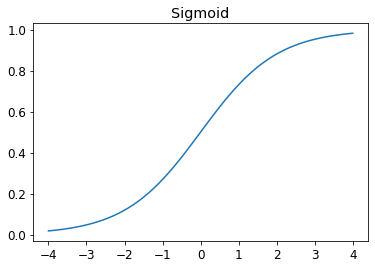

In [55]:
# Example of sigmoid from Pytorch function

plot_function(torch.sigmoid , title='Sigmoid' , min=-4 , max=4)

Sigmoid function squeezes the values between the range 0 and 1.

In [56]:
# Updating our above mnist_loss with a sigmoid function 
def mnist_loss(predictions, targets):
  return torch.where(targets == 1 , 1-predictions ,predictions).mean()

metric --> For human understanding 
loss --> For automatic updation (machine's metric to improve the performance of our model)

The loss function is calculated for each item in our dataset, and then at the end of an epoch, the loss values are all averaged and the overall mean is reported for the epoch.

Metrics on other hand are the numbers we care about and these are the values which are printed at end of each epoch that tells us how our model is doing.


### SGD and Mini-Batches 

Now in here we will try to automate most of the parts. 

- Batching a handful items into a seperate mini-batches and making computations on those mini-batches rather than computing on the whole dataset / items.
-Choosing a good batch size is one of the decisions one need to make a deep learning practitioner to train the model quickly and accurately.
- The important reason for having mini-batches is it could run on GPU, so the computations takes place even more faster. 


Before putting our data into batches, 
- We gotta randomly shuffle the data. 


- it prevents any bias during the training
- it prevents the model from learning the order of the training
- it helps the training converge fast

https://stats.stackexchange.com/questions/245502/why-should-we-shuffle-data-while-training-a-neural-network






#### DataLoader

A `DataLoader` can take any Python collection and turn it into a iterator (generator) over many batches. 

In [57]:
# Sample DataLoader 

coll = range(20) 
dls = DataLoader(coll , batch_size = 5 , shuffle = True)
list(dls)

[tensor([ 7, 17,  5,  9, 15]),
 tensor([19, 11, 10, 13,  2]),
 tensor([12,  0, 18, 16,  3]),
 tensor([ 1,  4,  6, 14,  8])]

`Dataset` --> Contains collection of both independent and dependent variable. 

In [58]:
# Example of Dataset 
ds = L(enumerate(string.ascii_lowercase))
ds

(#26) [(0, 'a'),(1, 'b'),(2, 'c'),(3, 'd'),(4, 'e'),(5, 'f'),(6, 'g'),(7, 'h'),(8, 'i'),(9, 'j')...]

In practice, we pass a `Dataset` to a `DataLoader` and it returns batches of independent and dependent variables.

### Putting it all together 

- Initialize the parameters 
- Making a prediction 
- Depending upon my prediction, will calculate my loss function.
- Call our good friend gradients, activate the gradients of our weights. Gradients helps in updating the parameters.
- We are going to perform to step, where we will multiply our learning with our weight gradients. 
- We will train this for our desired epochs. 


In [59]:
# re-initializing the parameters 
weights = init_params((28*28 , 1))
bias = init_params(1)


In [60]:
# Constructing our DataLoader 
dl = DataLoader(dset , batch_size= 256)
# Slicing off first mini-batch
xb , yb = first(dl)

# Checking the shape 
xb.shape , yb.shape

(torch.Size([256, 784]), torch.Size([256, 1]))

In [61]:
# Doing the same for validaton set 
valid_dl = DataLoader(valid_dset , batch_size = 256)

In [62]:
# Create the mini-batch of size 4 
batch = train_x[:4]
batch.shape

torch.Size([4, 784])

In [63]:
# Making predictions on our sample batch 
preds = linear1(batch)
preds


tensor([[  1.1245],
        [ -0.6243],
        [ -1.7694],
        [-12.7221]], grad_fn=<AddBackward0>)

In [65]:
# Labels 
train_y[:4]

tensor([[1],
        [1],
        [1],
        [1]])

In [66]:
# Calculating the loss 
loss = mnist_loss(preds , train_y[:4])
loss 

tensor(4.4978, grad_fn=<MeanBackward0>)

In [67]:
# Now calculating the gradients 
loss.backward()
print(f'Shape of weight calculated: {weights.grad.shape}')
print(f'Turning into a single tensor: {weights.grad.mean()}')
print(f'Bias: {bias.grad}')

Shape of weight calculated: torch.Size([784, 1])
Turning into a single tensor: -0.15112045407295227
Bias: tensor([-1.])


In [73]:
# Putting altogether in a function 
def calc_grad(xb , yb , model):
  '''
  xb --> mini-batched training set 
  yb --> mini-batched test set 
  model --> the model we want to use 
  '''
  # Making a prediction 
  preds = model(xb) 
  # Calculating the loss
  loss = mnist_loss(preds , yb)
  # Activating the gradients (for updating our weights)
  loss.backward() 
  


In [74]:
# Testing the above function 
calc_grad(batch , train_y[:4] , linear1)

# Below are the weights and biases after calculating the gradients above 
weights.grad.mean() , bias.grad

(tensor(-0.9067), tensor([-6.]))

In [75]:
# Calling it another time
calc_grad(batch , train_y[:4] , linear1)

# Below are wts and biases
weights.grad.mean() , bias.grad

(tensor(-1.0578), tensor([-7.]))

In [82]:
# Making the gradients to zero, so it won't affect the previous computer gradients 
weights.grad.zero_()
bias.grad.zero_()

tensor([0.])

In [83]:
# Now it won't add with the previous gradients (because we set it to zero)
# Calling it another time
calc_grad(batch , train_y[:4] , linear1)

# Below are wts and biases
weights.grad.mean() , bias.grad

(tensor(-0.1511), tensor([-1.]))

Awesome! So we have one remaining step, that is to update the weights and biases (parameters) on the gradient and the learnin rate. 

We set the gradients to zero to avoid the confusion when we try to compute the derivative to the next batch. 

It's time now to calculate the accuracy, to decide if an output represent a 3 or 7,
- if it's greater than 0, then it's 7 
- if it's less than 0, then it's 3 

Now the updated function trains a model with the learning rate. 

In [93]:
# It will have a step function and runs for one epoch 
def train_epoch(model , lr , params):
  # Training loop
  for xb , yb in dl:
    calc_grad(xb , yb , model)
    for p in params:
      p.data  -= p.grad * lr
      p.grad.zero_()

In [94]:
(preds > 0.0).float() == train_y[:4]

tensor([[ True],
        [False],
        [False],
        [False]])

Now we are creating a function that would calculate the accuracy from our x and y data batches. 

In [95]:
# Function to calculate the accuracy 
def batch_accuracy(xb , yb):
  '''
  xb --> input data with multiplied weights [model(xb)] 
  yb --> targets
  '''
  preds = xb.sigmoid()
  # Returns True (or) False
  correct = (preds > 0.5) == yb
  # Converting into 0s and 1s
  return correct.float().mean()

In [107]:
# Using the above function we've made 
print(f'We got the accuracy of: {batch_accuracy(linear1(batch) , train_y[:4])}')

We got the accuracy of: 0.25


Great our function works, to make it more sense let's make our model to make predictions on a validation set and calculate accuracy from there. 

In [103]:
# 
def validate_epoch(model):
  '''
  model --> Input your model (linear1)
  This function will calculate the accuracy on a validation dataloader 
  '''
  accs = [batch_accuracy(model(xb) , yb) for xb , yb in valid_dl]
  return round(torch.stack(accs).mean().item())

tensor(0.2500)